# CDL Cohort Project 2021: Week 1

In this notebook, we will summarise our work towards simulating a Google-like quantum supremacy experiment on
a trapped-ion quantum computer.

In [1]:
from src.simulation_utils import *
from src.plotting_utils import *

## Speckle Patterns

For our first task, we simulate random circuits.
These circuits consist of layers of random single-qubit gates and layers of random two-qubit MS gates.

1. Choose the number of qubits to simulate, and the depth of our random circuit:

In [2]:
n_qubits = 4         # Number of qubits
cct_depth = 1000     # Circuit depth

2. Initialize all qubits in the $| 0 \rangle$ state:

In [3]:
psi = tn.onedim.init_mps_allzero(n_qubits, 2)

3. Apply a random circuit:

In [4]:
for j in range(cct_depth//2):
    # Random single-qubit and two-qubit gate layer.
    one_qubit_layer = random_single_qubit_gate_layer(n_qubits)
    two_qubit_layer = random_two_qubit_gate_ladder(n_qubits)[np.mod(j, 2)]

    # Apply single-qubit gate layer.
    psi = tn.onedim.contract_mps_mpo(psi, one_qubit_layer)
    psi.left_canonise(chi=None)

    # Apply two-qubit gate layer.
    psi = tn.onedim.contract_mps_mpo(psi, two_qubit_layer)
    psi.left_canonise(chi=None)

4. Calculate the probabilities of measuring each output:

In [5]:
probs = output_probabilities(psi)

5. Plot the speckle pattern for our random circuit:

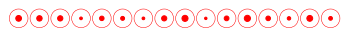

In [6]:
speckle_pattern(probs)

## Distributions

In [7]:
n_qubits = 8       # Number of qubits
cct_depth = 500    # Circuit depth

In [8]:
psi = tn.onedim.init_mps_allzero(n_qubits, 2)

In [9]:
slices = [0, 100, 200]

In [10]:
speckles, depths = [], []
for j in range(cct_depth//2):
    # Random single-qubit and two-qubit gate layer.
    one_qubit_layer = random_single_qubit_gate_layer(n_qubits)
    two_qubit_layer = random_two_qubit_gate_ladder(n_qubits)[np.mod(j, 2)]

    # Apply single-qubit gate layer.
    psi = tn.onedim.contract_mps_mpo(psi, one_qubit_layer)
    psi.left_canonise(chi=None)

    # Apply two-qubit gate layer.
    psi = tn.onedim.contract_mps_mpo(psi, two_qubit_layer)
    psi.left_canonise(chi=None)

    if j in slices:
        speckles.append(output_probabilities(psi))
        depths.append(j*2)

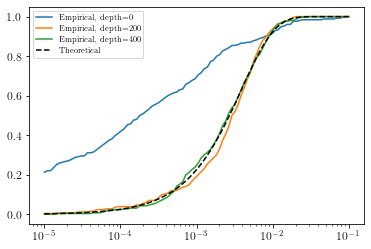

In [11]:
p = np.logspace(-5, -1, 100)
porter_thomas = 1 - np.exp(-(2 ** n_qubits) * p)

fig, ax = plt.subplots()

for s, d in zip(speckles, depths):
    ax.semilogx(
        p, cumulative(s, p), label="Empirical, depth={}".format(d)
    )

ax.semilogx(p, porter_thomas, 'k--', label="Theoretical")
ax.legend()